## Determining if an Effect is Real: *p*-values

In our earlier lessons, we have looked at examples that contained relatively strong linear relationships. In these examples, it was clear at first glance that there was a truly linear relationship between *x* and *y*, even if there was some additional noise present in the data. However, in many cases the data that we must work with is much more difficult to interpet. For example, consider the following data concerning the relationship between store sales and employee morale:

In [3]:
stores.df <- read.csv("data/store-sales.csv")
head(stores.df)

employee.morale.store.avg,sales
<dbl>,<dbl>
3.3,81274.03
6.0,164977.73
6.4,107675.28
8.3,91902.67
4.9,92642.81
6.8,84795.87


Graphing this data shows a very noisy relationship:

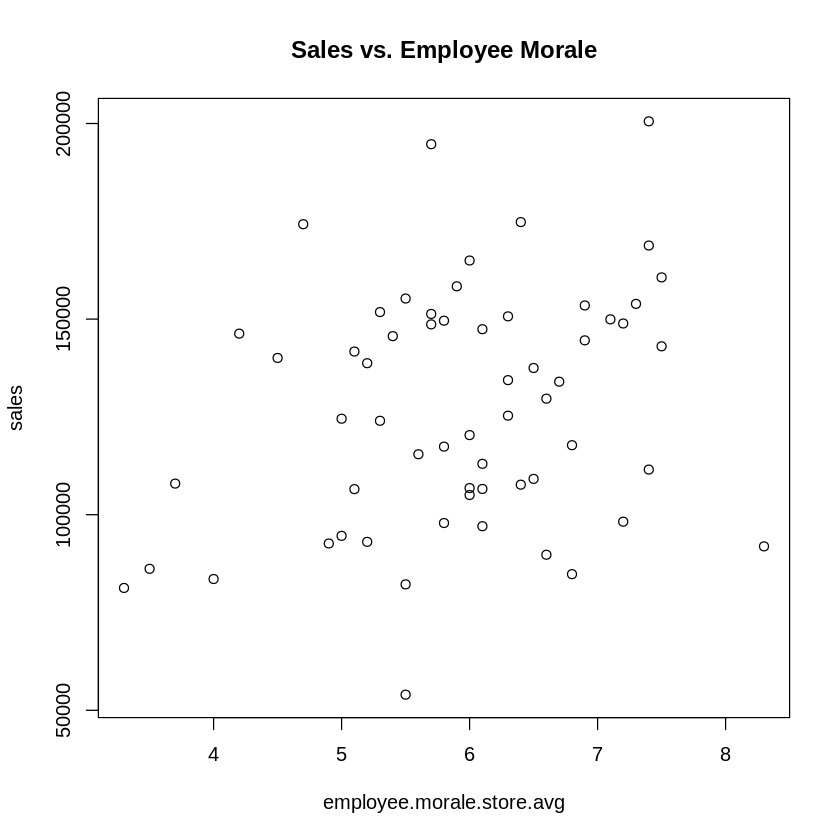

In [4]:
plot(stores.df, main="Sales vs. Employee Morale")
p <- recordPlot()

This data looks very much like noise, but we can still try fitting a linear model to it:

In [5]:
model <- lm(sales ~ employee.morale.store.avg, data=stores.df)

Let's visualize our linear model:

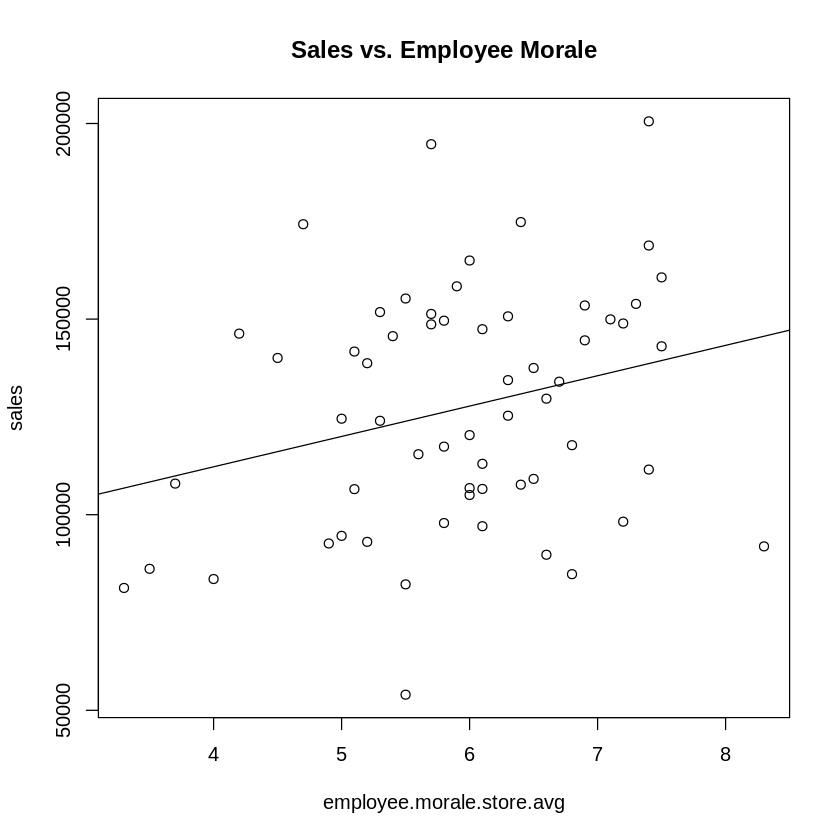

In [6]:
replayPlot(p)
abline(model)

We can examine the confidence intervals for the slope, just as we did in the previous lesson:

In [7]:
confint(model, 'employee.morale.store.avg')

,2.5 %,97.5 %
employee.morale.store.avg,397.4928,15125.89


We can see that the model identifies a non-zero slope, though the specific value of the slope is highly uncertain. But is this relationship real, or simply an illusion created by the noise in our data?  

## Understanding the *p*-Value

Let's step back and ask what the likely reason is that the data above is so noisy. There are many, many factors that will determine the sales of a particular store. Some possible candidates are:

1. Location 
2. Weather
3. Promotions/Marketing

Without data on at least some of these additional factors, it is highly unlikley that we will be able to predict store sales on the basis of employee morale alone. We therefore should not be surprised that our linear model accounts for only a small amount of the variance in our data. 

Given these unfortunate facts, we must lower our expectations: instead of asking "can I predict store sales from employee morale?" or "what is the response of store sales to a one point increase in employee morale?" let us simply ask: "do we have any evidence that employee morale affects store sales *at all*?" We may not be able to precisely determine the slope, but if we can at least conclusively establish the presence of some sort of effect we will be able to make better data-driven decisions such as, for example, evaluating the ROI of efforts to improve employee morale. 

It turns out that an elegant way to rephrase the above question regarding the existence of an effect is the following: "If employee morale has *no effect* on sales, meaning that the slope associated with the variable `employee.morale.store.avg` is zero, what are the odds that we would observe a relationship this strong purely by chance?"

We can examine the `summary` output below to see the answer to this question:

In [8]:
summary(model)


Call:
lm(formula = sales ~ employee.morale.store.avg, data = stores.df)

Residuals:
   Min     1Q Median     3Q    Max 
-69897 -22852   1234  21568  69269 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  81201      22199   3.658  0.00055 ***
employee.morale.store.avg     7762       3679   2.110  0.03920 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29720 on 58 degrees of freedom
Multiple R-squared:  0.07127,	Adjusted R-squared:  0.05526 
F-statistic: 4.451 on 1 and 58 DF,  p-value: 0.0392


Focus your attention on the column `Pr(>|t|)`, and in particular on the entry `0.03920` associated with our variable `employee.morale.store.avg`. This value, `0.03920`, is the "*p*-value" of this variable. It is the probability (subject to certain assumptions) that we would observe such a strong relationship between `sales` and `employee.morale.store.avg` if the true slope associated with `employee.morale.store.avg` was zero. Since, in this case, it is a very small probability (<4%), we may conclude that it is *highly unlikely* that the true slope is zero, and therefore it is *very likely* that employee morale has a non-zero effect on sales. 

If you ever need direct access to the *p*-value of a parameter, you can access it by storing the result of `summary` in a variable and then accessing the *p*-value using the appropriate column name, as shown below:

In [9]:
summary.result <- summary(model)
summary.result$coefficients['employee.morale.store.avg','Pr(>|t|)']

[1] 0.03920445

You may notice the other two unfamiliar columns in the output of `summary`, the `Std. Error` and the `t value`. While our focus in this lesson is on *p*-values, we will describe these other columns briefly for completeness. A given row of the `Std. Error` column is a measure of the uncertainty of our estimate of that parameter's value; a higher `Std. Error` means greater uncertainty. You can think of the `t value` as a measure of "how extreme" our measured value for a parameter is given the amount of noise in our dataset. A higher `t value` indicates a significant parameter measurement that is unlikely to be a side-effect of noise.  The `t value` is used to compute the *p*-value.

## Example: Store Sales in Another Region

While we identified a *statistically significant* relationship between employee morale and sales in the set of stores that we examined above, we should be cautious about generalizing this relationship too aggressively. Suppose that we have the following additional sales data for stores from a very different region - perhaps a different continent - that has a very different economic and cultural context than the set of stores that constituted our first dataset. Let's load this dataset:

In [10]:
other.df <- read.csv("data/store-sales-other-region.csv")
head(other.df)

sales,employee.morale.store.avg
<dbl>,<dbl>
105354.12,6.1
161960.96,3.2
85367.14,5.5
145490.96,5.8
98668.90,6.8
93694.03,4.4


A scatter plot reveals that the relationship between `sales` and `employee.morale.store.avg` is very noisy, much like our first dataset:

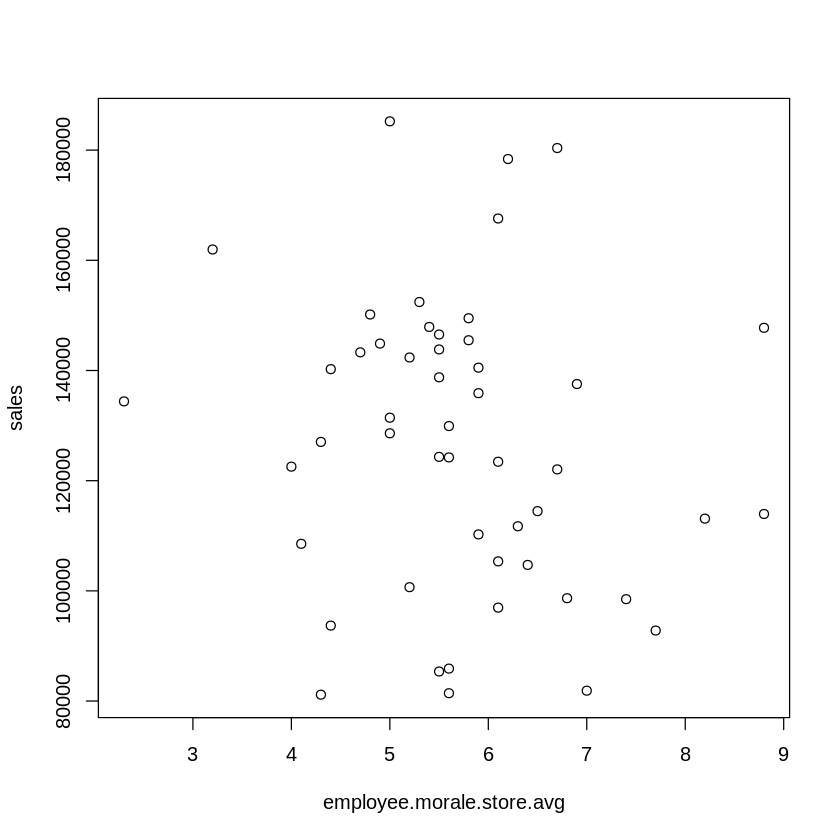

In [11]:
plot(sales ~ employee.morale.store.avg, data=other.df)

<span style="color:blue;font-weight:bold">Exercise</span>: Fit a linear model to the data in `other.df` using `lm` and store it in the variable `model.other`. Call the `summary` function to examine `model.other`, then pull out the *p*-value and store it in the variable `other.p.value` (see the example above.) Do you think the observed relationship between employee morale and sales for this sample is significant, or a coincidence due to noise?

In [32]:
# delete this entire line and replace it with your code

model.other <- lm(sales ~ employee.morale.store.avg, data=other.df)
summary(model.other)

other.p.coeff <- (summary(model.other))$coefficients
other.p.value <- other.p.coeff[2, 4]
other.p.coeff
other.p.value


Call:
lm(formula = sales ~ employee.morale.store.avg, data = other.df)

Residuals:
   Min     1Q Median     3Q    Max 
-50002 -19839  -1554  16355  57058 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 145217      17656   8.225 1.01e-10 ***
employee.morale.store.avg    -3269       3022  -1.082    0.285    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26460 on 48 degrees of freedom
Multiple R-squared:  0.0238,	Adjusted R-squared:  0.003459 
F-statistic:  1.17 on 1 and 48 DF,  p-value: 0.2848


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),145217.378,17656.199,8.224725,1.009673e-10
employee.morale.store.avg,-3268.757,3021.896,-1.081691,2.847944e-01


[1] 0.2847944

In [33]:
model.other.correct <- lm(sales ~ employee.morale.store.avg, data=other.df)
assert.true(all(model.other$coefficients == model.other.correct$coefficients), "Did you set <code>model.other</code> correctly?")
assert.true(round(other.p.value, 3) == 0.285, "Did you set <code>other.p.value</code> correctly?")
success()

Correct!

Finally, let's plot the data for both sets of stores in the same graph, to see why *p*-values are so useful:

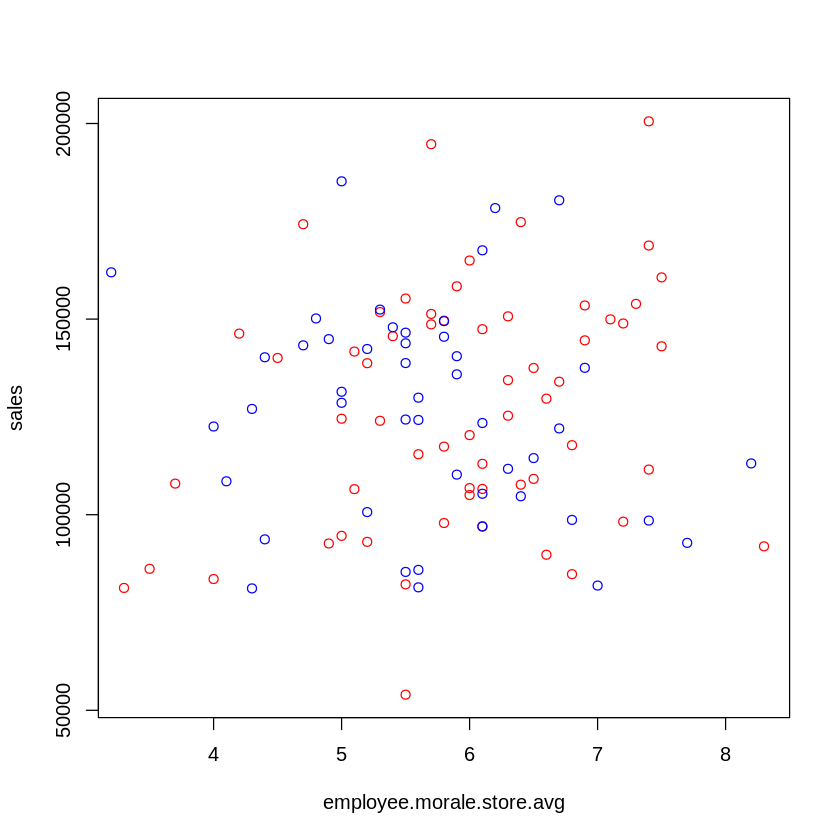

In [33]:
plot(sales ~ employee.morale.store.avg, data=stores.df, col="red")
points(sales ~ employee.morale.store.avg, data=other.df, col="blue")

As you can see, it is quite unclear at first glance which of these relationships is significant and which is quite likely due to noise. This is why *p*-values are so useful; they help us to figure out what effects are truly meaningful so that we can invest our resources wisely. 